### 1) 미니 프로젝트 배경

> 당신은 편의점 본사에서 데이터 분석 업무를 담당하는 팀원입니다. 북촌한옥마을 지역을 담당하고 있는 영업관리팀의 요청으로 북촌한옥마을 지역의 유동인구 추이를 분석하여 판매상품의 구성과 수량을 예측하는 머신러닝 모델을 개발하고 있습니다. 머신러닝 모델의 예측 팩터로 사용할 수 있는 요인(변수)을 찾기 위해서  서울시에서 제공하는 북촌 CCTV 유동인구에 대한 공공데이터를 분석하려고 합니다.
>

### 2) 미니 프로젝트 요구사항

1. Open API를 활용하여 공공데이터를 수집하고 분석합니다.
2. 서울 열린데이터광장([https://data.seoul.go.kr/](https://data.seoul.go.kr/))에 접속하고, Open API 인증키 신청 화면에서 [일반 인증키]를 신청합니다.
3. “서울시 북촌 CCTV 유동인구 수집 정보”를 검색하고, Open API를 활용하여 서버에 데이터를 요청합니다.
4. 서버에서 응답받은 내용을 해석하고, 필요한 데이터를 추출하여 Pandas 데이터프레임으로 정리합니다.
5. 기존 변수를 활용하여 파생변수를 3개 이상 생성하여 분석에 활용합니다.
6. 시각화 기법을 적용하여 북촌마을의 유동인구 변화를 분석하고, 분석의견을 기재하여 보고서를 작성합니다.

#### 1. Open API를 활용하여 공공데이터를 수집하고 분석합니다.


오픈 API(Open Application Programming Interface, Open API, 공개 API) 또는 공개 API는 개발자라면 누구나 사용할 수 있도록 공개된 API를 말하며, 개발자에게 사유 응용 소프트웨어나 웹 서비스의 프로그래밍 적인 권한을 제공한다.[1][2] 반대말은 프라이빗 API(Private API)다. 쉽게 말하면, "하나의 웹 사이트에서 자신이 가진 기능을 이용할 수 있도록 공개한 프로그래밍 인터페이스가 오픈 API다"라고 정의할 수 있다.[3]

네이버 지도, 구글맵, 오픈스트리트맵 등이 대표적인 예이다. 지도 서비스 및 다양한 서비스들에서 시도되고 있으며 누구나 접근하여 사용할 수 있다는 장점이 있다. 메타블로그도 오픈 API를 사용하여 만든 예시이다. 최근에 코로나 사태로 라이브코로나, 코로나 맵 등의 서비스가 생겼는데, 네이버클라우드플랫폼의 API 지원을 받고 있다

#### 2. 서울 열린데이터광장([https://data.seoul.go.kr/](https://data.seoul.go.kr/))에 접속하고, Open API 인증키 신청 화면에서 [일반 인증키]를 신청합니다.
#### 3. “서울시 북촌 CCTV 유동인구 수집 정보”를 검색하고, Open API를 활용하여 서버에 데이터를 요청합니다.



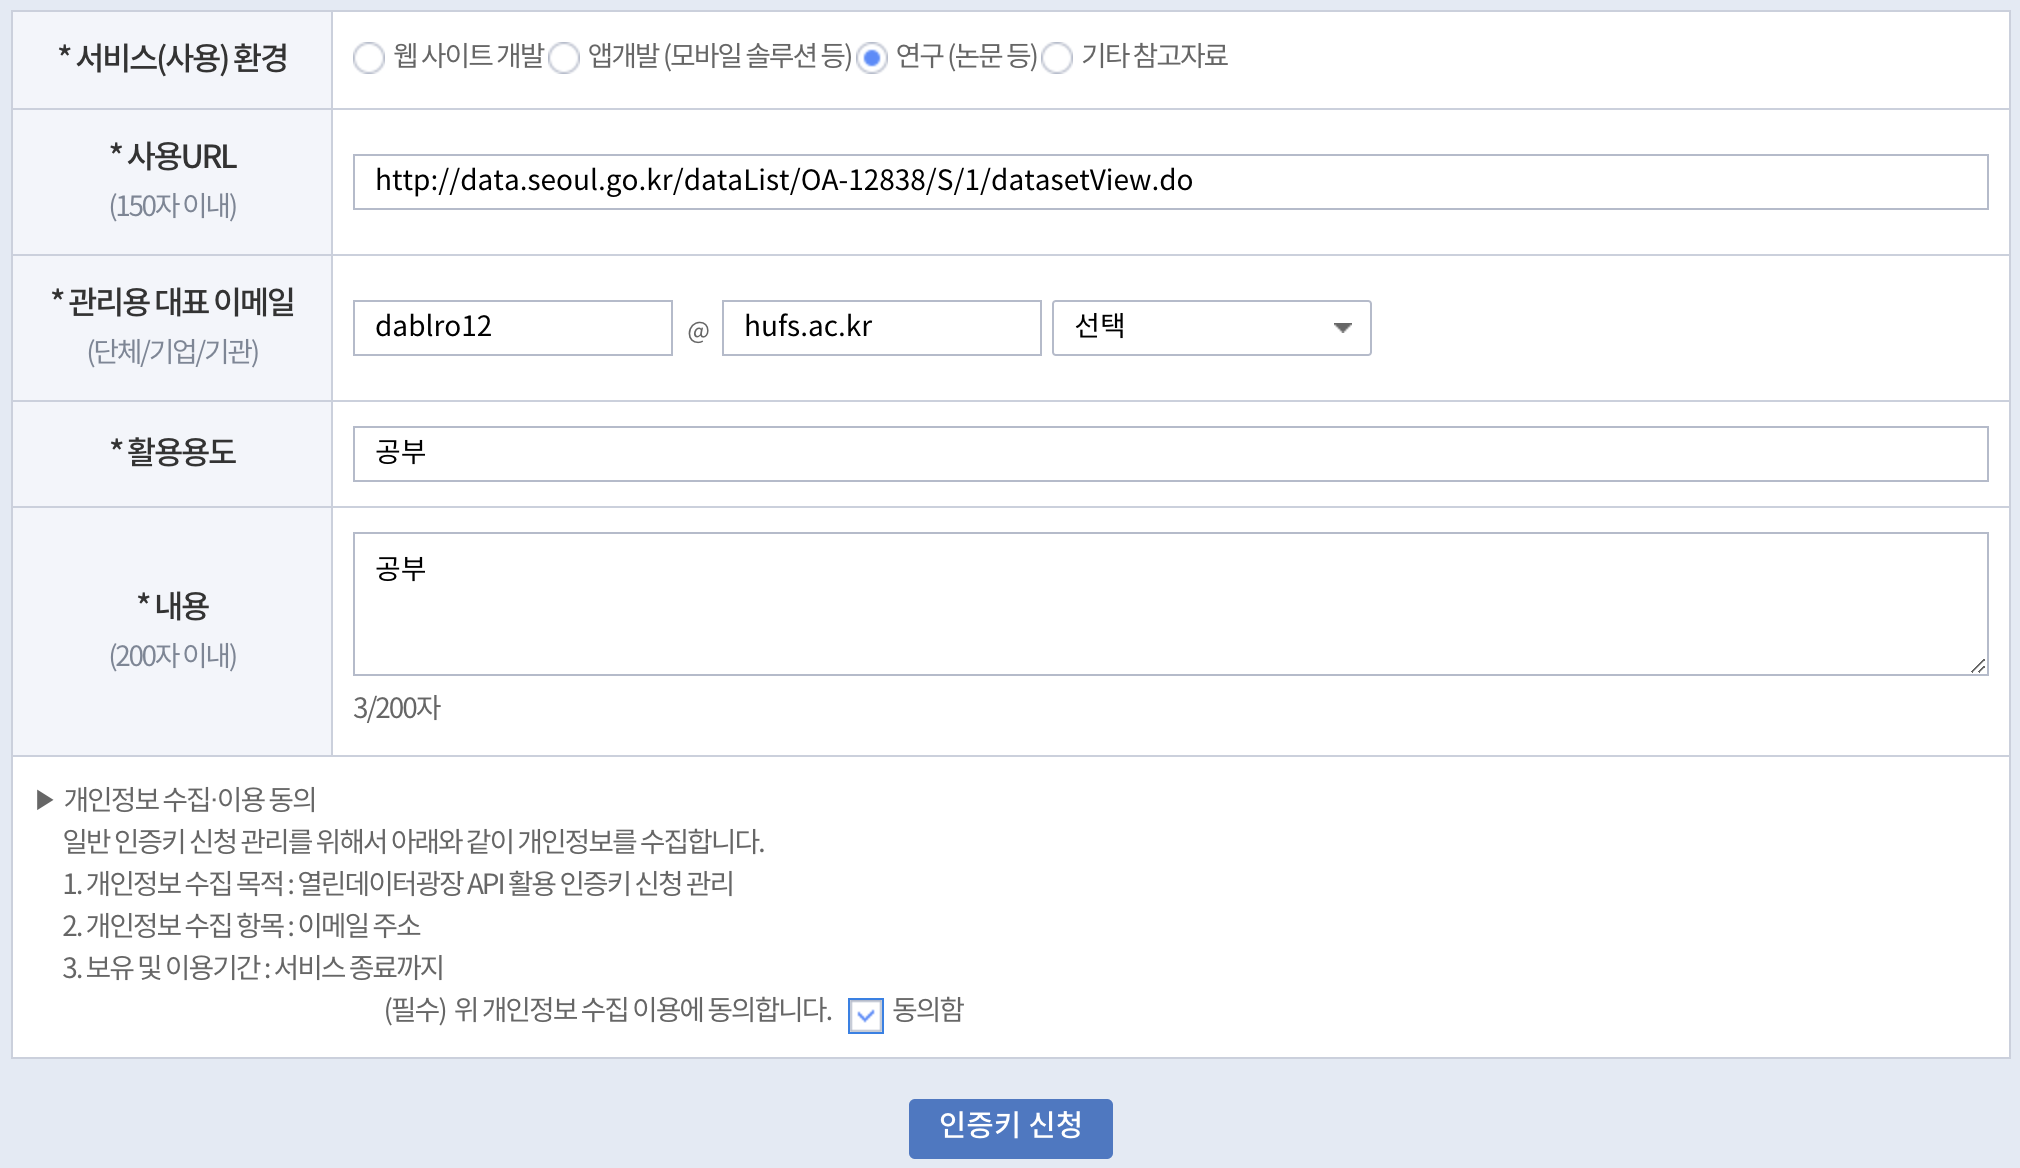

> 인증키 : 58484c6144646162393863444b5955
	
> http://openapi.seoul.go.kr:8088/[인증키번호]/[파일형식]/BukChonInOutPeopleInfo/1/[몇행까지 가지고 올지 ~2000]/

#### 4. 서버에서 응답받은 내용을 해석하고, 필요한 데이터를 추출하여 Pandas 데이터프레임으로 정리합니다.


In [47]:
# API가지고 오기
API_KEY = "58484c6144646162393863444b5955"
API_TYPE = "json"
API_URL = 'http://openapi.seoul.go.kr:8088/{}/{}/BukChonInOutPeopleInfo/1/1000/'.format(API_KEY, API_TYPE) #최대 1000개 까지 가능 
API_URL

'http://openapi.seoul.go.kr:8088/58484c6144646162393863444b5955/json/BukChonInOutPeopleInfo/1/1000/'

In [48]:
#API에 있는 JSON형식의 문자열을 우리 디렉토리 안에 넣기 (open API : JSON 파싱)
import os 
import json
import requests
import pandas as pd

res =requests.get(API_URL)
data= res.json()
#with open("BukChonInOutPeopleInfo.json", 'w') as json_file: #데이터 쓰기 및 저장 
#    json.dump(API_DATA, json_file)

print(type(data)) #-> 딕셔너리 

#딕셔너리 형태를 우리가 아는 DF으로 바꿔주기 : 내가 알고싶은건 'BukChonInOutPeopleInfo' 카테고리의 row  
df = pd.DataFrame(data['BukChonInOutPeopleInfo']['row'])

df.tail()


<class 'dict'>


,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0
999,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:20:42,2022-10-28 15:30:42,3182.0,3556.0


#### 5. 기존 변수를 활용하여 파생변수를 3개 이상 생성하여 분석에 활용합니다.

<파생변수>

> 1. ENDTIME의 월

> 2. ENDTIME의 일

> 3. ENDTIME의 시간



> 1. ENDTIME의 월


In [52]:
month = list(df['ENDTIME'])

month_li = list()
for i in month:
    month_li.append(i[5:7])
df['MONTH'] = month_li
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,11
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,11
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,11
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,11
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,11
...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10


> 2. ENDTIME의 일


In [56]:
day = list(df['ENDTIME'])

day_li = list()
for i in day:
    day_li.append(i[8:10])
df['day'] = day_li
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,day
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,11,30
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,11,30
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,11,30
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,11,30
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,11,30
...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,28
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,28
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,28
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,28


> 3. ENDTIME의 시간


In [57]:
time = list(df['ENDTIME'])

time_li = list()
for i in time:
    time_li.append(i[11:13])
df['time'] = time_li
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,day,time
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,11,30,21
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,11,30,21
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,11,30,21
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,11,30,21
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,11,30,21
...,...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,28,15
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,28,15
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,28,15
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,28,15


#### 6. 시각화 기법을 적용하여 북촌마을의 유동인구 변화를 분석하고, 분석의견을 기재하여 보고서를 작성합니다.


파생변수 별 유동인구 분석 과정 

> 1. 월별 유동인구 유입 인구 변화 추이 확인

> 2. 일병 유동인구 유출 인구 변화 추이 확인

> 3. 시간별 유동인구 유입 인구 변화 추이 확인

> 4. 덕성여고 앞 시간별 유동인구 변화 추이 확인


In [61]:
import seaborn as sns
%matplotlib inline

> 1. 월별 유입인구 변화 추이 확인


In [144]:
incount_month_df = df.loc[:,['INCOUNT','MONTH']]
outcount_month_df = df.loc[:,['OUTCOUNT','MONTH']]

In [162]:
li = incount_month_df['MONTH'].unique()

incount_month_dict = dict()
for i in li:
    con = incount_month_df['MONTH'] == str(i)
    cnt_li = list(incount_month_df[con]['INCOUNT'])
    
    incount_month_dict[i] =0
    for j in cnt_li:
        incount_month_dict[i] += j     

incount_month_dict

{'11': 282209.0, '01': 45.0, '12': 1411695.0, '10': 2233528.0}

type : <class 'dict'>


/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_73596/2111821923.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  incnt_month_df.sort_index(1)


<AxesSubplot: xlabel='month'>

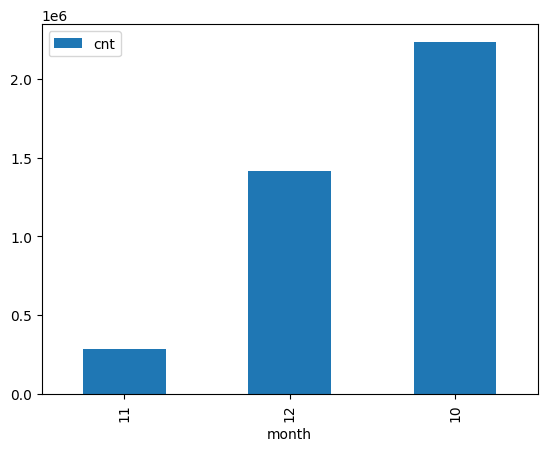

In [187]:
print("type : {}".format(type(incount_month_dict))) #->딕셔너리이므로 dataframe으로 바꿔줘야함

incnt_month_df = pd.DataFrame(list(incount_month_dict.items()), columns=['month', 'cnt'])
incnt_month_df= incnt_month_df.drop(index=1)
incnt_month_df.sort_index(1)

incnt_month_df.plot(kind ='bar', x= 'month') 

#10월이 가장 많다.

> 2. 일별 유출인구 변화 추이 확인


In [188]:

outcount_day_df = df.loc[:,['OUTCOUNT','day']]
outcount_day_df

,OUTCOUNT,day
0,13749.0,30
1,5279.0,30
2,13776.0,30
3,5312.0,30
4,13800.0,30
...,...,...
995,3324.0,28
996,16449.0,28
997,3443.0,28
998,16699.0,28


In [191]:
li = outcount_day_df['day'].unique()
outcount_day_dict = dict()
for i in li:
    con = outcount_day_df['day'] == str(i)
    cnt_li = list(outcount_day_df[con]['OUTCOUNT'])
    
    outcount_day_dict[i] =0
    for j in cnt_li:
        outcount_day_dict[i] += j     

outcount_day_dict

{'30': 311482.0,
 '01': 48910.0,
 '02': 381296.0,
 '03': 215409.0,
 '21': 0.0,
 '04': 175918.0,
 '05': 134395.0,
 '06': 210492.0,
 '07': 160042.0,
 '08': 182975.0,
 '09': 1961.0,
 '27': 1827616.0,
 '25': 46.0,
 '28': 582280.0}

In [201]:
outcnt_day_df = pd.DataFrame(list(outcount_day_dict.items()), columns=['day', 'cnt'])

plt_day = outcnt_day_df.set_index('day').sort_index()
plt_day

,cnt
day,
01,48910.0
02,381296.0
03,215409.0
04,175918.0
05,134395.0
06,210492.0
07,160042.0
08,182975.0
09,1961.0


<AxesSubplot: xlabel='day', ylabel='outcnt people'>

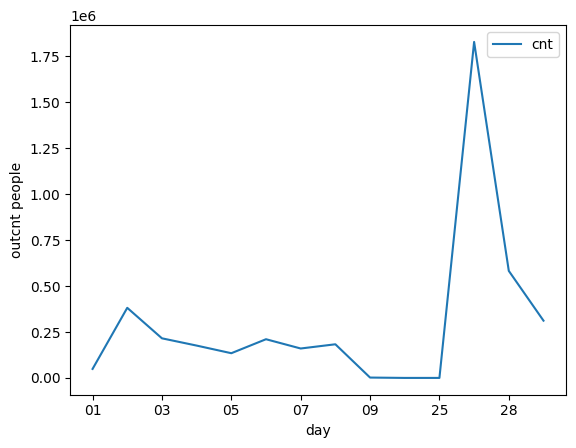

In [205]:
plt_day.plot(kind ='line', ylabel='outcnt people') 
#22년 10월~12월사이에는 월말에 사람이 많다.

> 3. 시간별 유입인구 변화 추이 확인


In [209]:

incount_time_df = df.loc[:,['INCOUNT','time']]

li = incount_time_df['time'].unique()
incount_time_dict = dict()
for i in li:
    con = incount_time_df['time'] == str(i)
    cnt_li = list(incount_time_df[con]['INCOUNT'])
    
    incount_time_dict[i] =0
    for j in cnt_li:
        incount_time_dict[i] += j     

incount_time_dict


{'21': 332867.0,
 '23': 323129.0,
 '22': 348512.0,
 '00': 2008.0,
 '11': 142917.0,
 '12': 272625.0,
 '06': 15949.0,
 '01': 5327.0,
 '20': 202569.0,
 '02': 6421.0,
 '08': 76476.0,
 '19': 260839.0,
 '13': 338897.0,
 '04': 10901.0,
 '03': 8014.0,
 '18': 270971.0,
 '07': 37966.0,
 '09': 89067.0,
 '05': 15148.0,
 '14': 374817.0,
 '15': 319122.0,
 '16': 202903.0,
 '10': 94231.0,
 '17': 175801.0}

In [210]:
#sorting 
incnt_time_df = pd.DataFrame(list(incount_time_dict.items()), columns=['time', 'cnt'])

plt_day = incnt_time_df.set_index('time').sort_index()
plt_day

,cnt
time,
00,2008.0
01,5327.0
02,6421.0
03,8014.0
04,10901.0
05,15148.0
06,15949.0
07,37966.0
08,76476.0


<AxesSubplot: xlabel='time', ylabel='outcnt people'>

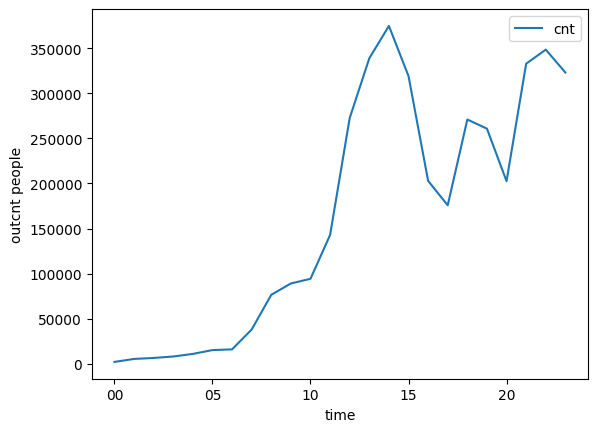

In [211]:
plt_day.plot(kind ='line', ylabel='incnt people')  #확실히 새벽에는 사람이 없고 오후에는 사람이 많다.
#22년 10월~12월사이에는 월말에 사람이 많다. 

> 4. 덕성여고 앞 시간별 유동인구 변화 추이 확인


In [221]:
duksung_time_df = df.loc[df['DESCRIPTION']=="덕성여고 앞",['time','OUTCOUNT']]
duksung_time_df

,time,OUTCOUNT
1,21,5279.0
3,21,5312.0
5,21,5347.0
8,21,5376.0
9,23,5555.0
...,...,...
875,23,6837.0
877,03,26.0
879,05,58.0
883,09,448.0


In [222]:
li = duksung_time_df['time'].unique()
duksung_time_dict = dict()
for i in li:
    con = duksung_time_df['time'] == str(i)
    cnt_li = list(duksung_time_df[con]['OUTCOUNT'])
    
    duksung_time_dict[i] =0
    for j in cnt_li:
        duksung_time_dict[i] += j     

duksung_time_dict


{'21': 72504.0,
 '23': 60848.0,
 '22': 74682.0,
 '00': 152.0,
 '11': 4580.0,
 '12': 18279.0,
 '06': 1626.0,
 '01': 342.0,
 '20': 24315.0,
 '02': 318.0,
 '08': 5201.0,
 '19': 43455.0,
 '13': 27340.0,
 '04': 696.0,
 '03': 443.0,
 '18': 50667.0,
 '07': 3729.0,
 '09': 3169.0,
 '05': 1254.0,
 '14': 30473.0,
 '15': 27792.0,
 '16': 19854.0,
 '17': 11800.0,
 '10': 492.0}

In [223]:
#sorting 
duksung_incnt_time_df = pd.DataFrame(list(duksung_time_dict.items()), columns=['time', 'cnt'])

plt_duksung = duksung_incnt_time_df.set_index('time').sort_index()
plt_duksung

,cnt
time,
00,152.0
01,342.0
02,318.0
03,443.0
04,696.0
05,1254.0
06,1626.0
07,3729.0
08,5201.0


<AxesSubplot: xlabel='time', ylabel='outcnt people'>

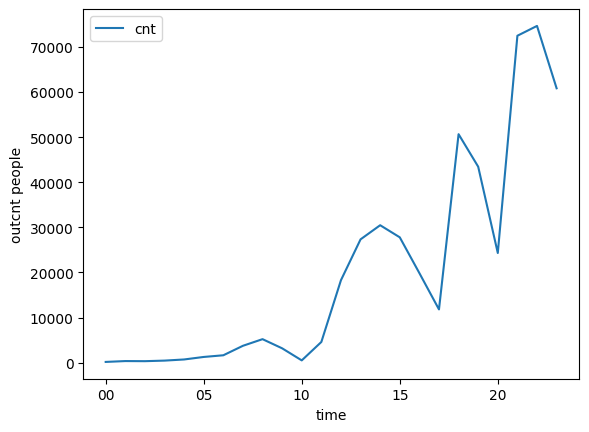

In [224]:
#plot
plt_duksung.plot(kind ='line', ylabel='outcnt people')  #확실히 새벽에는 사람이 없고 오후에는 사람이 많다.
#22년 10월~12월사이에는 월말에 사람이 많다.  #->저녁에 사람이 많고 아침시간과 저녁시간에 사람이 많다 저녁에 다들 집에가니까 야자시간쯤 20시 넘어서 제일많다.